In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
%cd "/content/drive/My Drive/maisam_project"

/content/drive/My Drive/maisam_project


In [ ]:
data=pd.read_csv('Copy of df_2.csv')

In [ ]:
data=data[['year', 'log GDP_o', 'log GDP_d','log Dist_coord' , 'log FLOW']]

In [ ]:
data1=data[:10000]

In [ ]:
data1.to_csv('gravity_data.csv')

In [ ]:
df=pd.read_csv('gravity_data.csv')

In [ ]:
# del data['Date']

In [ ]:
data.columns

Index(['year', 'log GDP_o', 'log GDP_d', 'log Dist_coord', 'log FLOW'], dtype='object')

In [ ]:
data.head()

,year,log GDP_o,log GDP_d,log Dist_coord,log FLOW
0,1990,37.108755,29.110241,12.964419,27.417802
1,1991,37.108755,29.225325,12.964419,27.417802
2,1992,37.108755,29.360813,12.964419,27.417802
3,2010,37.108755,31.012164,12.964419,27.417802
4,2011,37.108755,30.994342,12.964419,27.417802


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [ ]:
train.columns

Index(['year', 'log GDP_o', 'log GDP_d', 'log Dist_coord', 'log FLOW'], dtype='object')

**Training**


In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [ ]:
X_train=train[['year', 'log GDP_o', 'log GDP_d'
       , 'log Dist_coord']]
y_train=train['log FLOW']

X_test=test[['year', 'log GDP_o', 'log GDP_d',
       , 'log Dist_coord']]
y_test=test['log FLOW']

In [ ]:
model1 = LinearRegression().fit(X_train, y_train)

In [ ]:
y_test_pred=model1.predict(X_test)

In [ ]:
print(r2_score(y_test, y_test_pred,multioutput='variance_weighted'))


0.73672112


In [ ]:
mean_squared_error(y_test, y_test_pred)

12.63729282


LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
data.columns

Index(['year', 'log GDP_o', 'log GDP_d', 'log Dist_coord', 'log FLOW'], dtype='object')

In [ ]:
data

,year,log GDP_o,log GDP_d,log Dist_coord,log FLOW
0,1990,37.108755,29.110241,12.964419,27.417802
1,1991,37.108755,29.225325,12.964419,27.417802
2,1992,37.108755,29.360813,12.964419,27.417802
3,2010,37.108755,31.012164,12.964419,27.417802
4,2011,37.108755,30.994342,12.964419,27.417802
...,...,...,...,...,...
947105,2010,32.505648,33.610547,8.642244,25.472534
947106,2011,32.670976,33.769398,8.642244,25.717417
947107,2012,32.869158,33.910336,8.642244,25.809002
947108,2013,33.006575,34.062431,8.642244,26.214560


In [ ]:
data.columns

Index(['year', 'log GDP_o', 'log GDP_d', 'log Dist_coord', 'log FLOW'], dtype='object')

In [ ]:
dataset = data[['log FLOW']]
train = train[['log FLOW']]
valid = test[['log FLOW']]
dataset = dataset.values
train = train.values
valid = valid.values

In [ ]:
scaled_data = scaler.fit_transform(dataset)


In [ ]:
past_values = 3
x_train, y_train = [], []
for i in range(past_values, len(train)):
    x_train.append(scaled_data[i-past_values:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=4, batch_size=1024, verbose=2)

Epoch 1/4
740/740 - 3s - loss: 0.0403
Epoch 2/4
740/740 - 3s - loss: 0.0310
Epoch 3/4
740/740 - 3s - loss: 0.0309
Epoch 4/4
740/740 - 3s - loss: 0.0309


In [ ]:
#predicting validation data values, using past_values from the train data
inputs = dataset[len(dataset) - len(valid) - past_values:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(past_values, inputs.shape[0]):
    X_test.append(inputs[i-past_values:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_flow = model.predict(X_test)
predicted_flow = scaler.inverse_transform(predicted_flow)


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-predicted_flow),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
9.750715283229358


In [ ]:
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(data, test_size=0.2, shuffle=False)

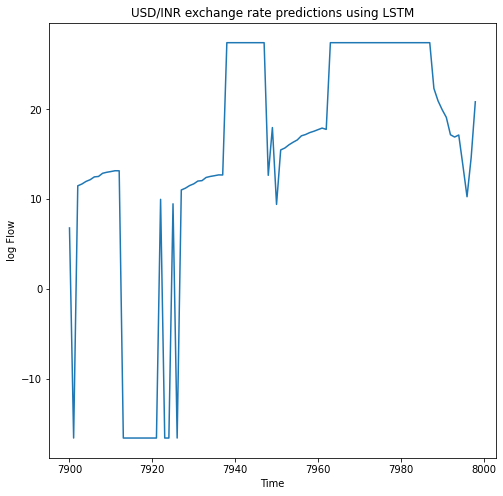

In [ ]:
#plot
plt.figure(figsize=(8,8))
plt.title('USD/INR exchange rate predictions using LSTM')
plt.ylabel('log Flow')
plt.xlabel('Time')

train = train1[['log FLOW']]
valid = test1[['log FLOW']]
valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = predicted_flow)
plt.plot(train['log FLOW'][7900:7999])
